# Binary Heap

### Max Binary Heap
#### Each parent has at most two child nodes
#### The value of each parent node is always greater than its child nodes
#### In a max Binary Heap the parent is greater than the children, but there are no qurantees between sibling nodes
#### A binary heap is as compact as possible. All the children of each node are as full as they can be and left children are filled out first
#### parent index: floored (child_index - 1)/2, left child index: 2Xparent_index + 1, right child index: 2Xparent_index + 2

### Big O
#### Insertion - O(logN), Romoval - O(logN), Search - O(N)

In [5]:
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [176]:
class MaxBinaryHeap:
    
    def __init__(self):
        self.values = []
        
    def insert(self, value):
        # append the value into the values property on the heap
        self.values.append(value)
        index = len(self.values)-1
        parent_index = int((index-1)/2)
        # keep looping as long as the values element at the parent_index
        # is less than the values element at the child index
        while index > 0 and self.values[parent_index] < self.values[index]:
            # swap the value of the values element at the parent_index
            # with the value of the element property at the child index
            self.values[parent_index], self.values[index] =  self.values[index], self.values[parent_index]
            # set the index to be parent_index, and start over
            index = parent_index
            parent_index = int((index-1)/2)
            
        return self
    

    def graph(self):
        """
        Builds Binary Heap graph with node level labels 
        """
        
        nodes = self.values
        # string representation of nodes
        nodes_str = []
        
        if not len(nodes):
            return None
        max_graph = nx.Graph()
        # string representation of root node
        root_node = 'ROOT: ' + str(nodes[0])
        nodes_str.append(root_node)
        # add lroot node on graph
        max_graph.add_node(root_node)
        for i in range(len(nodes)):
            # left and right children indexes of the current parent element
            left_child_idx = 2*i + 1
            right_child_idx = 2*i + 2
            # binary tree level of parent element
            parent_level = int(math.log2(i+1))
            # if left child exist
            if len(nodes) > left_child_idx:
                # string representation of left child
                left_child = f'{parent_level+1}L: {str(nodes[left_child_idx])}'
                nodes_str.append(left_child)
                # add left child on graph and draw connection with parent
                max_graph.add_node(left_child)
                max_graph.add_edge(nodes_str[i], left_child)
            # if right child exist
            if len(nodes) > right_child_idx:
                # string representation of right child
                right_child = f'{parent_level+1}R: {str(nodes[right_child_idx])}'
                nodes_str.append(right_child)
                # add right child on graph and draw connection with parent
                max_graph.add_node(right_child)
                max_graph.add_edge(nodes_str[i], right_child)
        
        print("Nodes of graph: ", max_graph.nodes())
        print("Binary Heap values: ", nodes)
        nx.draw(max_graph, with_labels = True)
        plt.show()
            
    
    def extract_max(self):
        """
        Romoves root from the heap. Rearrange values in heap.
        Returns old root
        """
        if not self.values:
            return None
        # swap the first value in values property with the last one
        last_index = len(self.values) - 1 
        self.values[0], self.values[last_index] = self.values[last_index], self.values[0]
        # pop from the values property to return the value at the end
        ex_root = self.values.pop()
        # call sink_down function to place 'new root' to correct spot
        if self.values:
            self.sink_down()
        
        return ex_root
        
    
    def sink_down(self):
        """Function to 'sink-down' root to the correct spot"""
        
        # parent index starts at 0
        idx = 0
        length = len(self.values)
        element = self.values[0]
        while True:
            # left child index
            left_child_idx = 2 * idx + 1
            # right child index
            right_child_idx = 2 * idx + 2
            # index of element to swap with
            swap = None
            
            # need to swap parent element with the largest child
            # if child is greater than parent
            
            # if left child exist
            if left_child_idx < length:
                left_child = self.values[left_child_idx]
                # and left child is greater than element to 'sink-down'
                if left_child > element:
                    # swap index is left child index
                    swap = left_child_idx
            # if right child exist
            if right_child_idx < length:
                right_child = self.values[right_child_idx]
                # if swap index was not found before (left child is less than element)
                # and right child is greater than element
                # or if swap index was found before (lift child is greater than element)
                # but right child is greater than left child
                if (not swap and right_child > element) or \
                    (swap and right_child > left_child):
                        # swap index is right child index
                        swap = right_child_idx
            # if left and right children is less then element
            # then parent element is in correct spot
            if not swap:
                break
            # if swap index was found swap parent with one of children
            self.values[idx], self.values[swap] = self.values[swap], self.values[idx]
            # index of parent element after swap
            idx = swap

In [65]:
mbh = MaxBinaryHeap()

In [66]:
for i in np.random.randint(2, 500, 8):
    mbh.insert(i)

Nodes of graph:  ['ROOT: 488', '1L: 446', '1R: 261', '2L: 423', '2R: 20', '2L: 21', '2R: 54', '3L: 16']


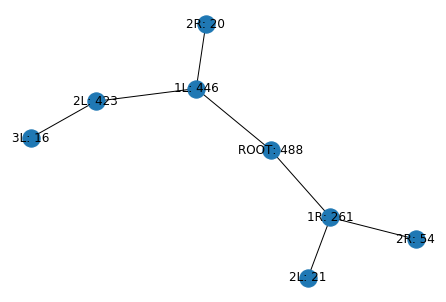

In [67]:
mbh.graph()

In [177]:
mbh2 = MaxBinaryHeap()
lst = [55,39,41,18,27,12,33]
for i in lst:
    mbh2.insert(i)

Nodes of graph:  ['ROOT: 55', '1L: 39', '1R: 41', '2L: 18', '2R: 27', '2L: 12', '2R: 33']
Binary Heap values:  [55, 39, 41, 18, 27, 12, 33]


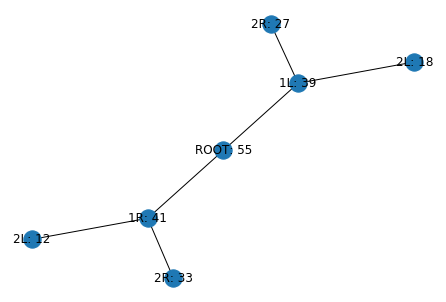

In [178]:
mbh2.graph()

### Priority Queue

#### A data structure where each element has a priority. 
#### Elements with a higher priorities are served before elements with lower prioritirs

In [153]:
class Node:
    """PiorityQueue Node"""
    
    def __init__(self, value, priority):
        self.value = value
        self.priority = priority

In [168]:
class PriorityQueue:
    
    def __init__(self):
        self.values = []
        
        
    def enqueue(self, value, priority):
        """
        Enqueue method accepts a value and priority, makes a new node,
        and puts in the right spot based off of its priority
        """
        
        new_node = Node(value, priority)
        # append the value into the values property on the heap
        self.values.append(new_node)
        self.bubble_up()
        
        
    def bubble_up(self):
        """
        Method to 'bubble up' last node in values list
        to the correct spot
        """
        idx = len(self.values)-1
        element = self.values[idx]
        parent_idx = int((idx-1)/2)
        parent = self.values[parent_idx]
        
        # keep looping as long as the values element at the parent_index
        # is less than the values element at the child index
        while idx > 0 and element.priority < parent.priority:
            # swap the value of the values element at the parent_index
            # with the value of the element property at the child index
            self.values[parent_idx], self.values[idx] =  self.values[idx], self.values[parent_idx]
            # set the index to be parent_index, and start over
            idx = parent_idx
            parent_idx = int((idx-1)/2)
            parent = self.values[parent_idx]
            
        return self
        
        
    def dequeue(self):
        """
        Romoves root from the heap. Rearrange values in heap.
        Returns old root
        """
        if not self.values:
            return None
        # swap the first value in values property with the last one
        last_index = len(self.values) - 1 
        self.values[0], self.values[last_index] = self.values[last_index], self.values[0]
        # pop from the values property to return the value at the end
        ex_root = self.values.pop()
        # call sink_down function to place 'new root' to correct spot
        if self.values:
            self.sink_down()
        
        return ex_root
        
    
    def sink_down(self):
        """Function to 'sink-down' root to the correct spot"""
        
        # parent index starts at 0
        idx = 0
        length = len(self.values)
        element = self.values[0]
        while True:
            # left child index
            left_child_idx = 2 * idx + 1
            # right child index
            right_child_idx = 2 * idx + 2
            # index of element to swap with
            swap = None
            
            # need to swap parent element with the largest child
            # if child is greater than parent
            
            # if left child exist
            if left_child_idx < length:
                left_child = self.values[left_child_idx]
                # and left child is greater than element to 'sink-down'
                if left_child.priority < element.priority:
                    # swap index is left child index
                    swap = left_child_idx
            # if right child exist
            if right_child_idx < length:
                right_child = self.values[right_child_idx]
                # if swap index was not found before (left child is less than element)
                # and right child is greater than element
                # or if swap index was found before (lift child is greater than element)
                # but right child is greater than left child
                if (not swap and right_child.priority < element.priority) or \
                    (swap and right_child.priority < left_child.priority):
                        # swap index is right child index
                        swap = right_child_idx
            # if left and right children is less then element
            # then parent element is in correct spot
            if not swap:
                break
            # if swap index was found swap parent with one of children
            self.values[idx], self.values[swap] = self.values[swap], self.values[idx]
            # index of parent element after swap
            idx = swap
            
            
    def graph(self):
        """
        Builds Piority Queue graph with node tree level, 
        priority and value labels
        """
        
        nodes = self.values
        # string representation of nodes
        nodes_str = []
        
        if not len(nodes):
            return None
        max_graph = nx.Graph()
        root_node = nodes[0]
        # string representation of root node
        root_node_str = f'ROOT(P: {root_node.priority}, V: {root_node.value})' 
        nodes_str.append(root_node_str)
        # add root node on graph
        max_graph.add_node(root_node_str)
        for i in range(len(nodes)):
            # left and right children indexes of the current parent element
            left_child_idx = 2*i + 1
            right_child_idx = 2*i + 2
            # binary tree level of parent element
            parent_level = int(math.log2(i+1))
            # if left child exist
            if len(nodes) > left_child_idx:
                left_child = nodes[left_child_idx]
                # string representation of left child
                left_child_str = f'{parent_level+1}L(P: {left_child.priority}, V: {left_child.value})'
                nodes_str.append(left_child_str)
                # add left child on graph and draw connection with parent
                max_graph.add_node(left_child_str)
                max_graph.add_edge(nodes_str[i], left_child_str)
            # if right child exist
            if len(nodes) > right_child_idx:
                right_child = nodes[right_child_idx]
                # string representation of right child
                right_child_str = f'{parent_level+1}R(P: {right_child.priority}, V: {right_child.value})'
                nodes_str.append(right_child_str)
                # add right child on graph and draw connection with parent
                max_graph.add_node(right_child_str)
                max_graph.add_edge(nodes_str[i], right_child_str)
        
        print("Nodes of graph: ", max_graph.nodes())
        nx.draw(max_graph, with_labels = True)
        plt.show()

In [169]:
er = PiorityQueue()

In [170]:
queue_lst = [('common cold', 5), ('gunshot wound', 1), ('high fever', 4), ('broken arm', 2), ('glass in foot', 3)]

In [171]:
for value, priority in queue_lst:
    er.enqueue(value, priority)

Nodes of graph:  ['ROOT(P: 1, V: gunshot wound)', '1L(P: 2, V: broken arm)', '1R(P: 4, V: high fever)', '2L(P: 5, V: common cold)', '2R(P: 3, V: glass in foot)']


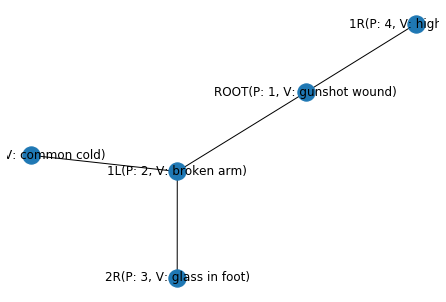

In [172]:
er.graph()